In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, color, img_as_bool, exposure, transform
%matplotlib inline

# location of original images
subdirectory = 'images/'

In [2]:
# read csv with pixel locations of aircraft and label updates
new_labels_x = pd.read_csv('new_plane_labels.csv')
print(new_labels_x.head())
print(new_labels_x.dtypes)
print(new_labels_x.shape)

                   img_name  x1_pixel  y1_pixel good_label
0  2016-10-10T19+44+49_610Z       406       212       True
1  2016-08-23T16+35+03_560Z       390       222       True
2  2016-10-16T14+30+49_470Z       387       214       True
3  2016-11-12T19+05+51_000Z       106       118       True
4  2016-08-23T16+47+21_730Z        89       135       True
img_name      object
x1_pixel       int64
y1_pixel       int64
good_label      bool
dtype: object
(47, 4)


(9, 4)


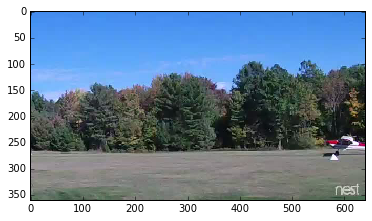

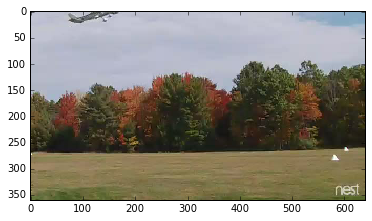

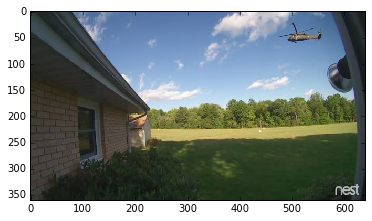

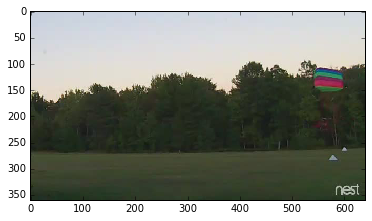

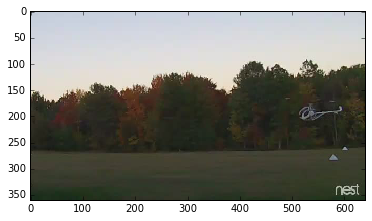

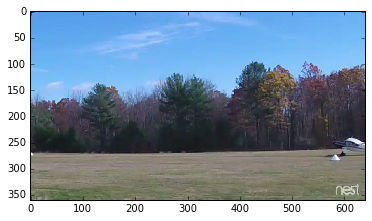

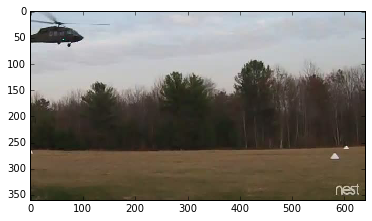

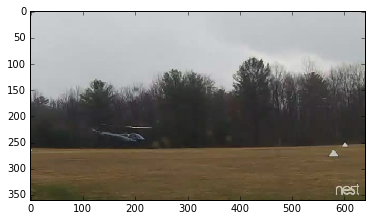

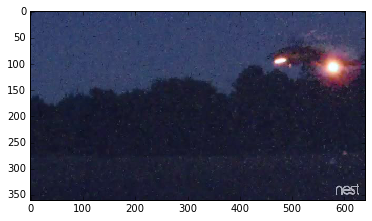

In [3]:
# look at the labels being disregarded
bad_labels = new_labels_x[new_labels_x['good_label']==False]
print(bad_labels.shape)
for index, row in bad_labels.iterrows():
    toRead = subdirectory + row['img_name']
    img_raw = io.imread(toRead)
    plt.figure()
    io.imshow(img_raw)

In [4]:
# filter to include only the *good* labels for training
new_labels = new_labels_x[new_labels_x['good_label']==True]
print(new_labels.shape)

(38, 4)


In [5]:
features_list = []
y_list = []
imnames_list = []

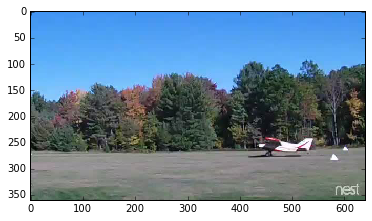

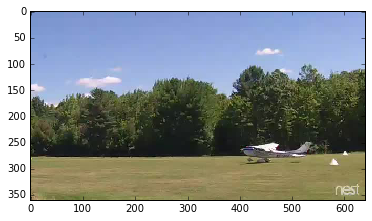

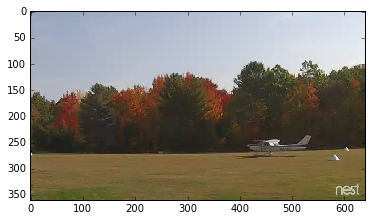

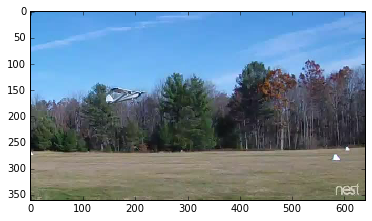

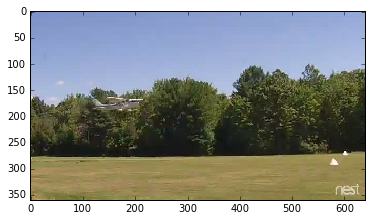

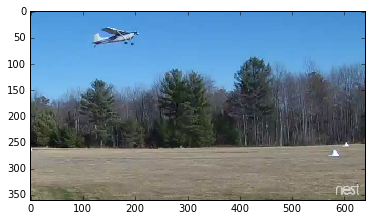

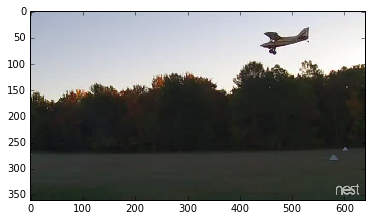

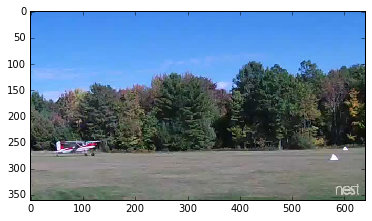

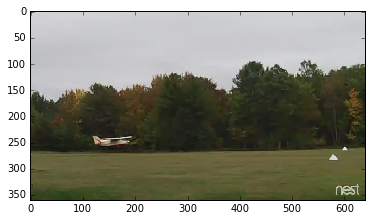

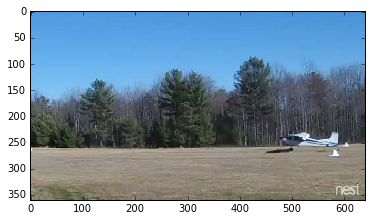

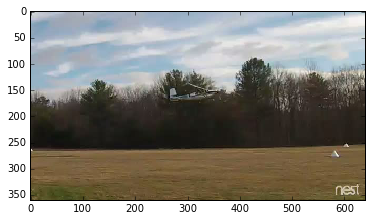

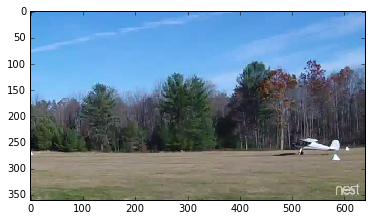

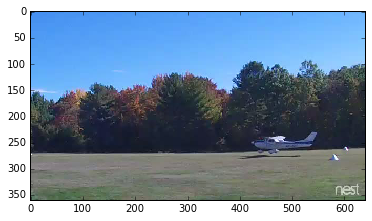

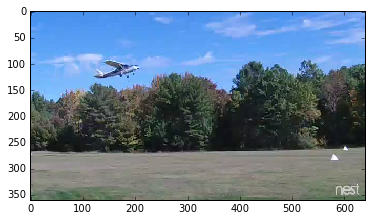

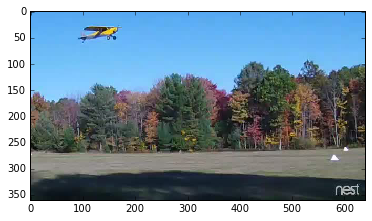

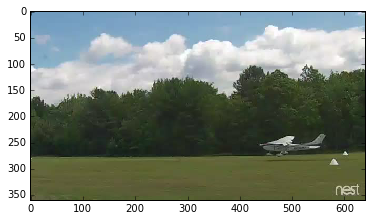

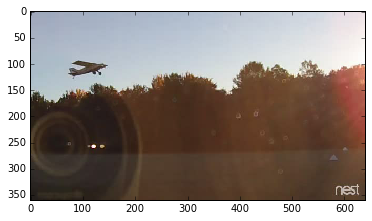

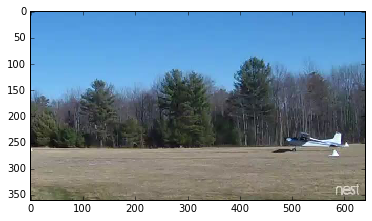

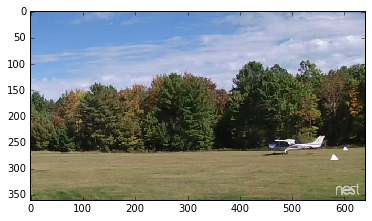

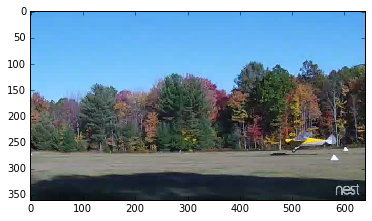

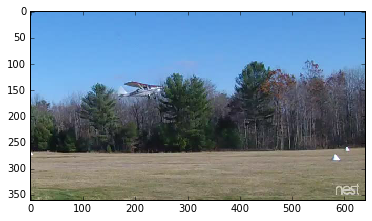

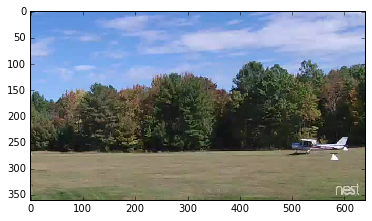

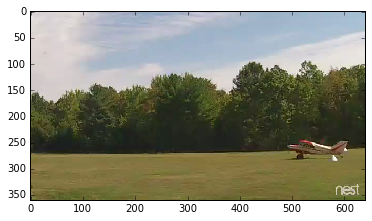

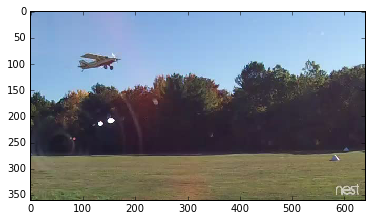

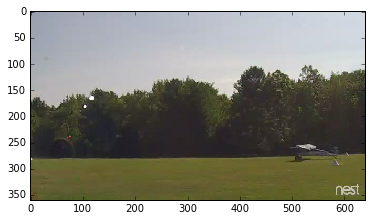

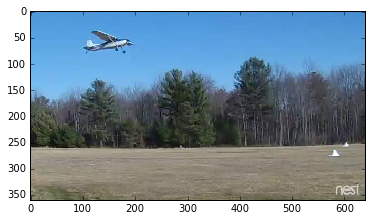

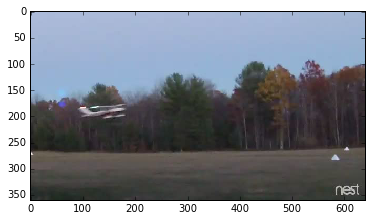

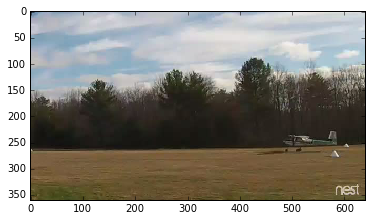

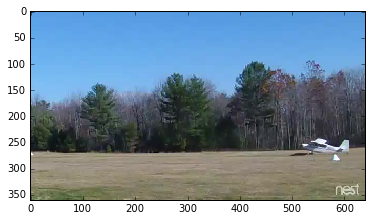

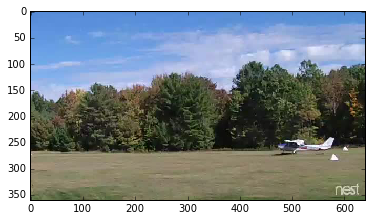

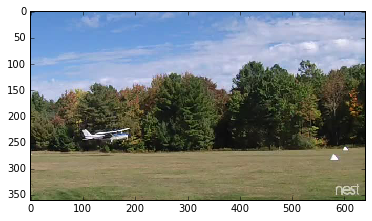

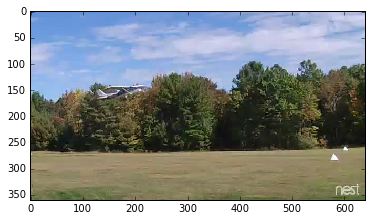

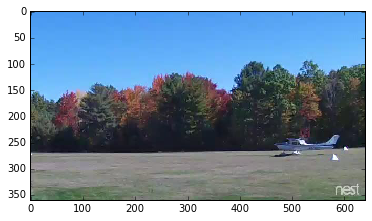

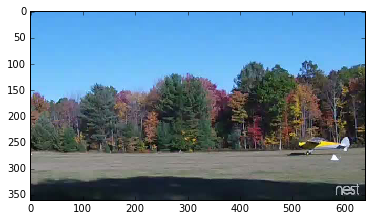

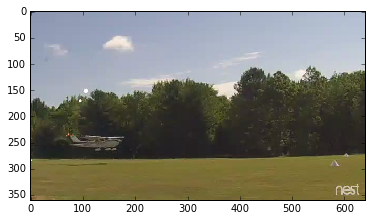

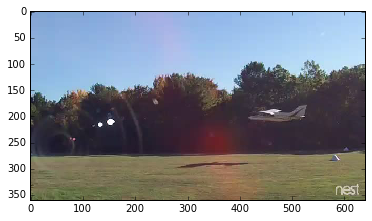

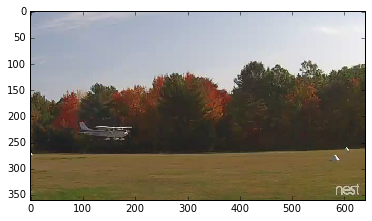

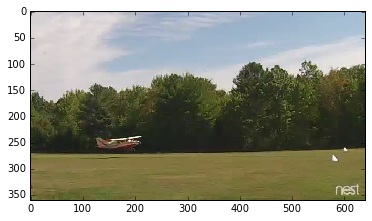

In [6]:
# get and look at examples of images containing aircraft
import warnings
warnings.filterwarnings('ignore')

crop_pixels = 20 # number of pixels by which the crop will be furthered

for index, row in new_labels.iterrows():
    toRead = subdirectory + row['img_name']
    img_raw = io.imread(toRead)
    final_image = img_raw
    # save the final image to features_list
    features_list.append(final_image)
    imnames_list.append(row['img_name'])
    y_list.append(True)
    # view the image
    plt.figure()
    io.imshow(final_image)

### performance measures

In [ ]:
class BinaryClassificationPerformance():
    '''Performance measures to evaluate the fit of a binary classification model'''
    
    def __init__(self, predictions, labels, desc, probabilities=None):
        '''Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y'''
        '''probabilities-optional, probability that Y is equal to True'''
        self.probabilities = probabilities
        self.performance_df = pd.concat([pd.DataFrame(predictions), pd.DataFrame(labels)], axis=1)
        self.performance_df.columns = ['preds', 'labls']
        self.desc = desc
        self.performance_measures = {}
        self.image_indices = {}
  
    def compute_measures(self):
        '''Compute performance measures defined by Flach p. 57'''
        self.performance_measures['Pos'] = self.performance_df['labls'].sum()
        self.performance_measures['Neg'] = self.performance_df.shape[0] - self.performance_df['labls'].sum()
        self.performance_measures['TP'] = ((self.performance_df['preds'] == True) & (self.performance_df['labls'] == True)).sum()
        self.performance_measures['TN'] = ((self.performance_df['preds'] == False) & (self.performance_df['labls'] == False)).sum()
        self.performance_measures['FP'] = ((self.performance_df['preds'] == True) & (self.performance_df['labls'] == False)).sum()
        self.performance_measures['FN'] = ((self.performance_df['preds'] == False) & (self.performance_df['labls'] == True)).sum()
        self.performance_measures['Accuracy'] = (self.performance_measures['TP'] + self.performance_measures['TN']) / (self.performance_measures['Pos'] + self.performance_measures['Neg'])
        self.performance_measures['Precision'] = self.performance_measures['TP'] / (self.performance_measures['TP'] + self.performance_measures['FP'])
        self.performance_measures['Recall'] = self.performance_measures['TP'] / self.performance_measures['Pos']

    def img_indices(self):
        '''Get the indices of true and false positives to be able to locate the corresponding images in a list of image names'''
        self.performance_df['tp_ind'] = ((self.performance_df['preds'] == True) & (self.performance_df['labls'] == True))
        self.performance_df['fp_ind'] = ((self.performance_df['preds'] == True) & (self.performance_df['labls'] == False))
        self.image_indices['TP_indices'] = np.where(self.performance_df['tp_ind']==True)[0].tolist()
        self.image_indices['FP_indices'] = np.where(self.performance_df['fp_ind']==True)[0].tolist()